#  Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (student-por[1].csv) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('student-por.csv', sep=';')
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [4]:
# check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
# see the rows with missing data
df[df.isna().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [6]:
# check the numerical columns
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [7]:
# check for duplicate values
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [8]:
# drop duplicates
df.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [9]:
# alternative: save non-duplicates
df = df[~df.duplicated()]
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## 5. Outliers Check

* Find any outliers
* Deal with the outliers

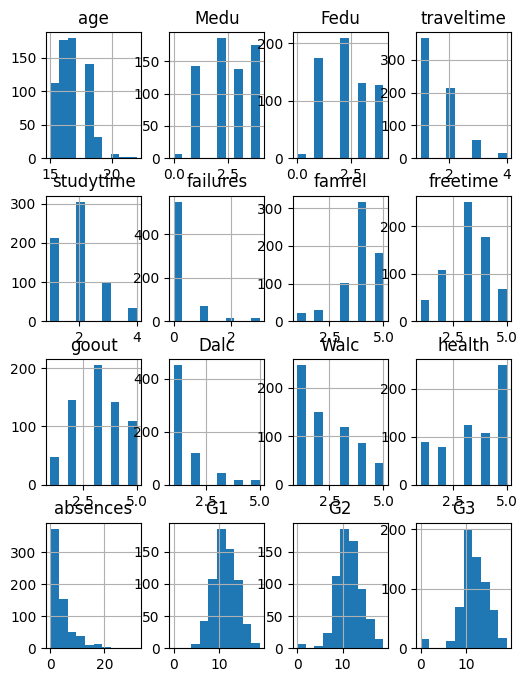

In [10]:
# look at the histograms of all numeric columns
df.hist(figsize = (6,8));

## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [11]:
# check for missing values
df[df.isna().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [12]:
# check for inconsistent text
# df.activity_level.value_counts() # The column 'activity_level' does not exist in this DataFrame.
# Let's inspect the columns to find potential object type columns to check for inconsistent text.
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [13]:
# check for duplicate values
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [14]:
# check for outliers
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [15]:
# first round of data cleaning is complete!
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [16]:
# Check for missing data
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [17]:
# Check for unique values in object columns to identify inconsistencies
for col in df.select_dtypes(include='object').columns:
    print(f"Value Counts for column: {col}")
    print(df[col].value_counts())
    print("\n")

Value Counts for column: school
school
GP    423
MS    226
Name: count, dtype: int64


Value Counts for column: sex
sex
F    383
M    266
Name: count, dtype: int64


Value Counts for column: address
address
U    452
R    197
Name: count, dtype: int64


Value Counts for column: famsize
famsize
GT3    457
LE3    192
Name: count, dtype: int64


Value Counts for column: Pstatus
Pstatus
T    569
A     80
Name: count, dtype: int64


Value Counts for column: Mjob
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64


Value Counts for column: Fjob
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64


Value Counts for column: reason
reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64


Value Counts for column: guardian
guardian
mother    455
father    153
other      41
Name: count, dtype: int64


Value Counts for column: school

In [18]:
# check for duplicate values
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


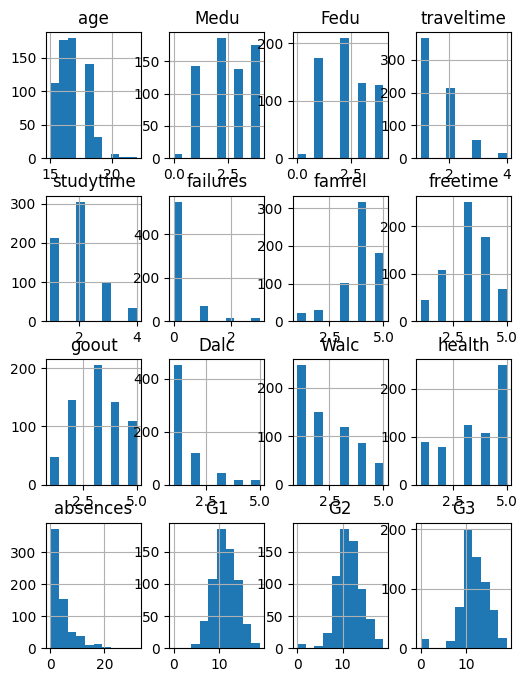

In [19]:
# look at the histograms of all numeric columns
df.hist(figsize = (6,8));

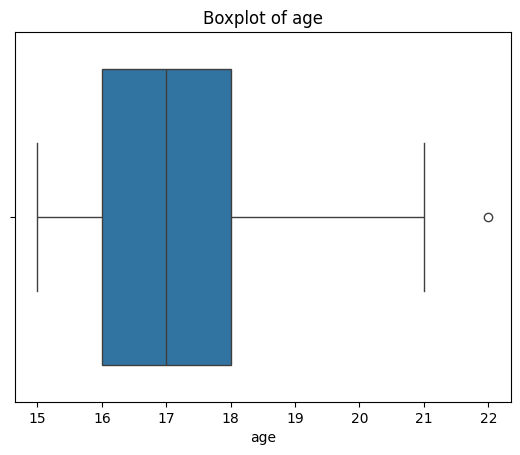

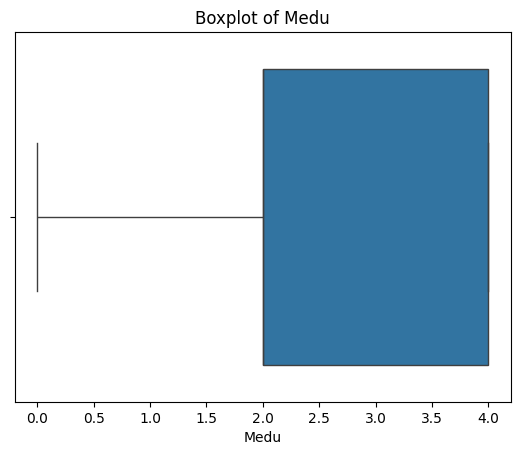

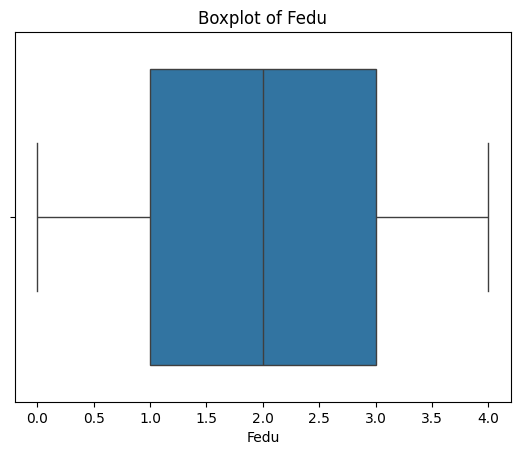

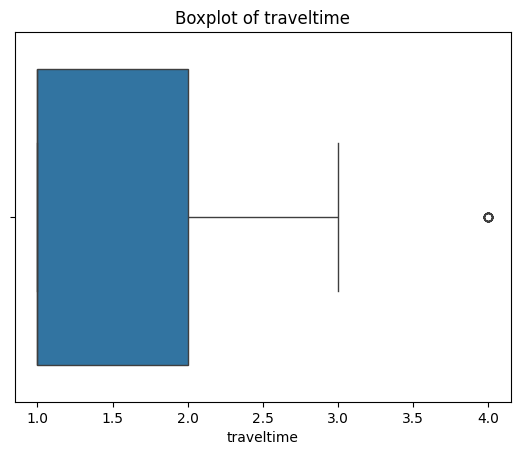

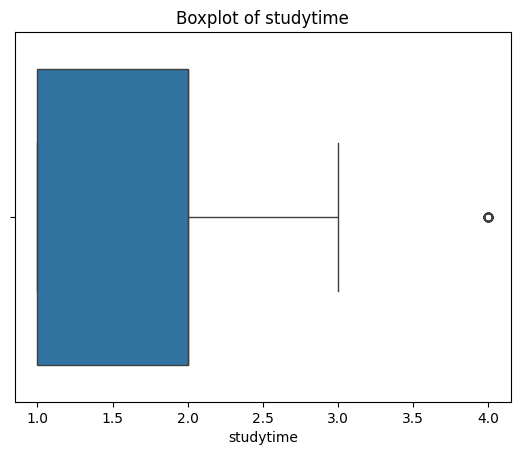

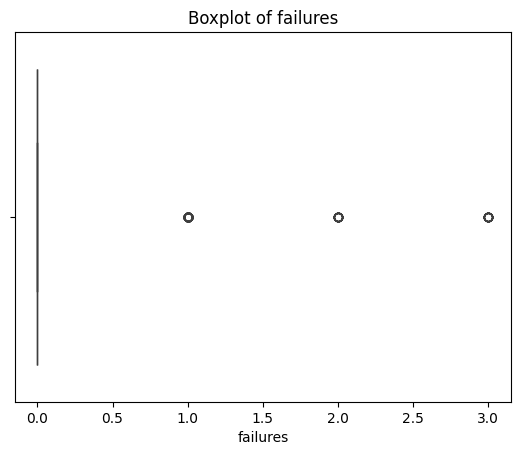

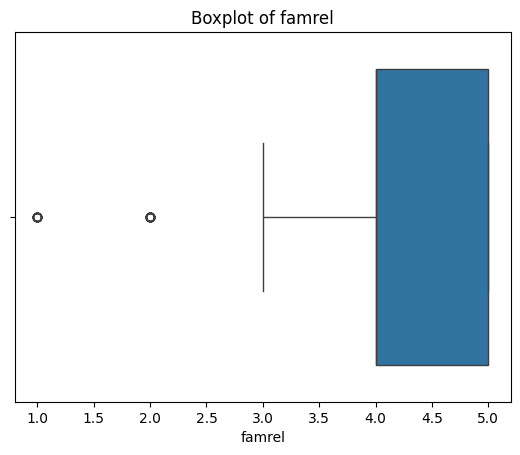

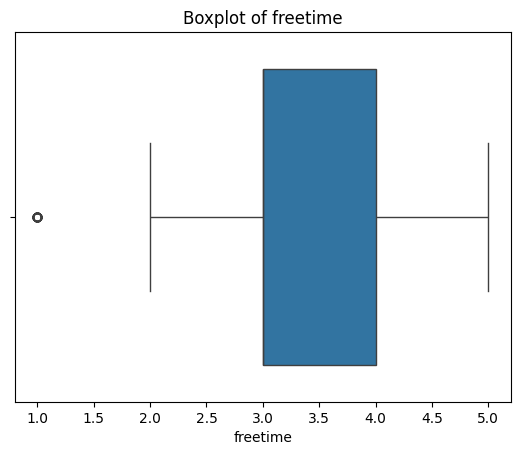

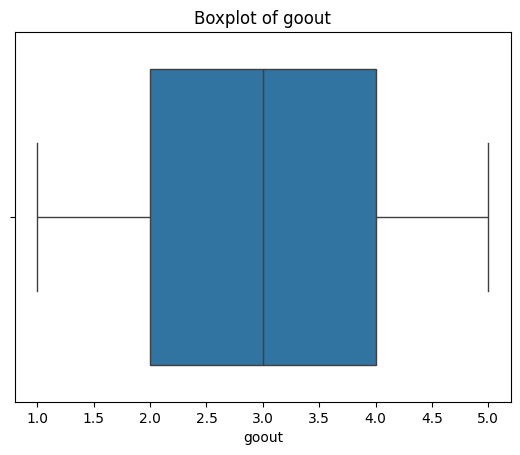

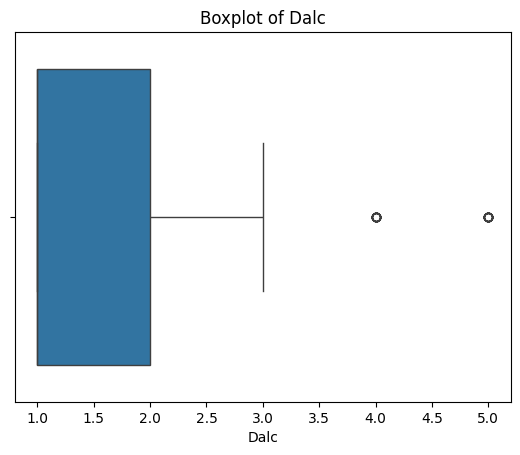

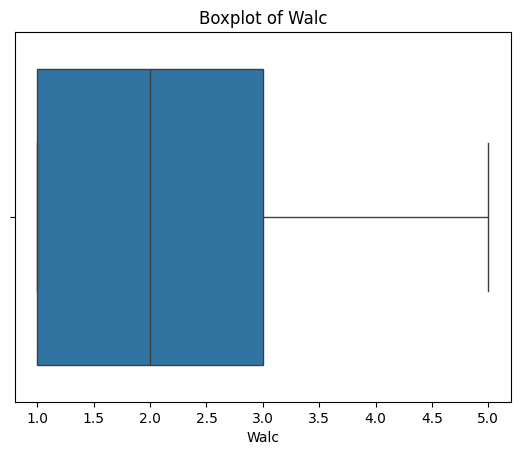

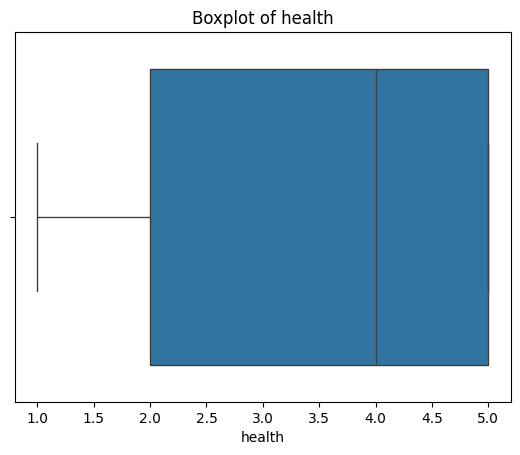

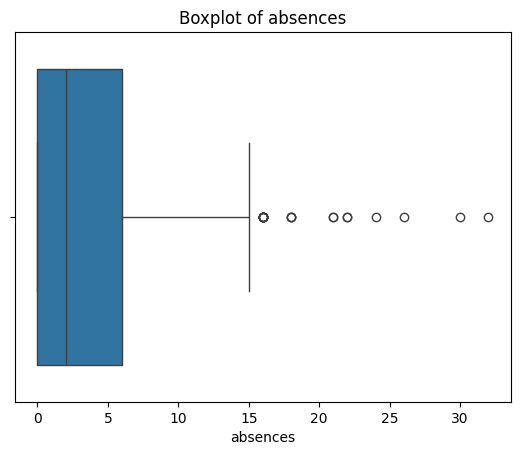

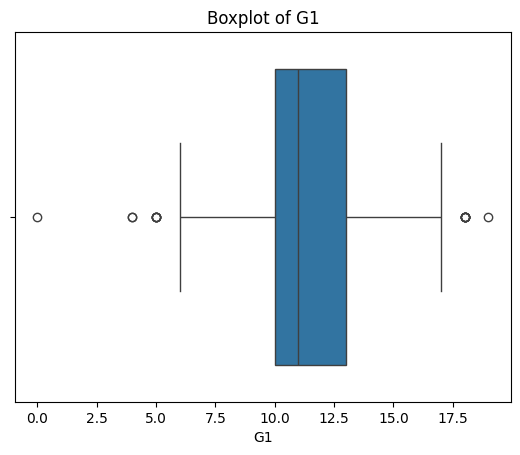

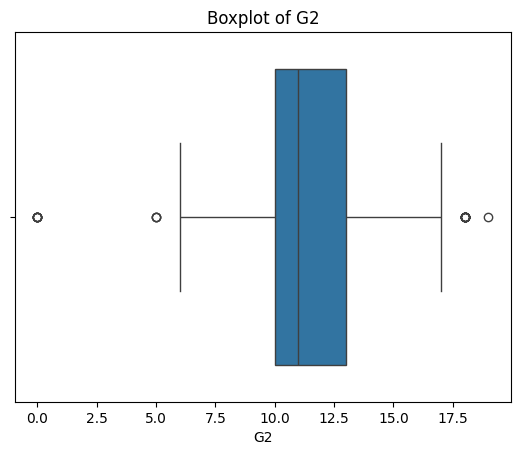

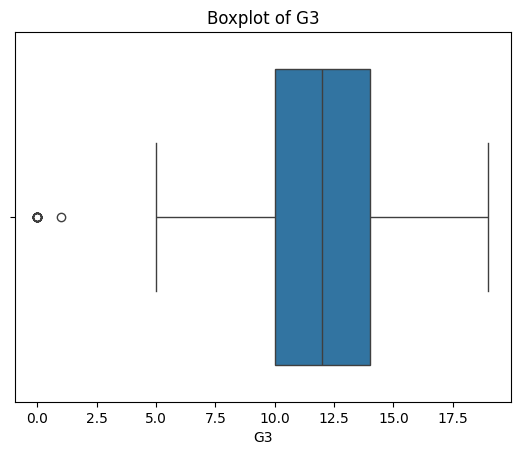

In [20]:
# look at the boxplot of the number of snoozes - This code might be from a previous dataset.
# Let's examine numerical columns in the current dataframe for outliers instead.
# We can use boxplots for each numerical column.
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure() # Create a new figure for each boxplot
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [21]:
# Create a new column for the average of the final grades
df['Average Grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.333333


In [22]:
import numpy as np

# Create a new column indicating if the student passed (average grade >= 10)
df['Passed'] = np.where(df['Average Grade'] >= 10, True, False)
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grade,Passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,7.333333,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,10.333333,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,12.333333,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,14.000000,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,12.333333,True


In [23]:
# check for missing values
df[df.isna().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grade,Passed


In [24]:
# check for duplicate values
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grade,Passed


In [25]:
# check for outliers
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,11.625064
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,2.833360
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.666667


In [26]:
# first round of data cleaning is complete!
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grade,Passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,7.333333,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,10.333333,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,12.333333,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,14.000000,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,12.333333,True


In [27]:
import os
print(os.listdir())

['.config', 'student-por.csv', 'sample_data']


In [28]:
# check the data types
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [29]:
import numpy as np

# Create a new column for the average of the final grades
df['Average Grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grade,Passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,7.333333,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,10.333333,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,12.333333,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,14.000000,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,12.333333,True


In [30]:
# Create a new column indicating if the student passed (average grade >= 10)
df['Passed'] = np.where(df['Average Grade'] >= 10, True, False)
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grade,Passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,7.333333,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,10.333333,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,12.333333,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,14.000000,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,12.333333,True


# Task
Analyze the relationship between the newly created 'Passed' column and other relevant features in the DataFrame to understand what factors might influence whether a student passes.

## Identify relevant features

### Subtask:
Choose a few relevant features from the DataFrame that might influence whether a student passes (e.g., 'studytime', 'absences', 'internet', 'Medu', 'Fedu', etc.).


**Reasoning**:
Display the column names to identify relevant features for analysis.



In [31]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Average Grade',
       'Passed'],
      dtype='object')


**Reasoning**:
Create a list of relevant features based on the column names displayed.



In [32]:
relevant_features = ['studytime', 'absences', 'internet', 'Medu', 'Fedu', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'romantic', 'traveltime', 'goout']
print(relevant_features)

['studytime', 'absences', 'internet', 'Medu', 'Fedu', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'romantic', 'traveltime', 'goout']


## Analyze relationships with categorical features

### Subtask:
For categorical features, group the data by the feature and calculate the proportion of students who passed within each group. Visualize the results using bar plots.


**Reasoning**:
Identify categorical features from the relevant features list and iterate through them to calculate and plot the proportion of students who passed within each category.



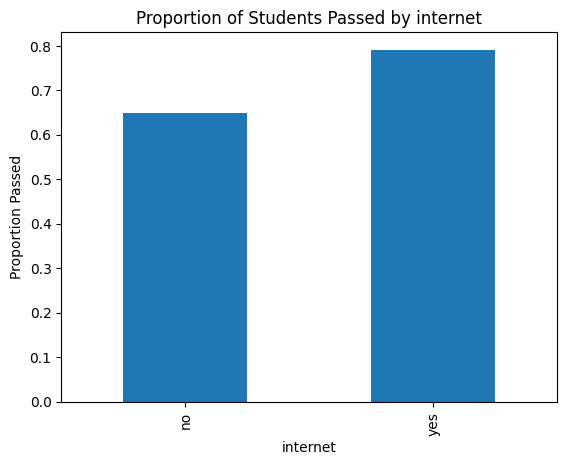

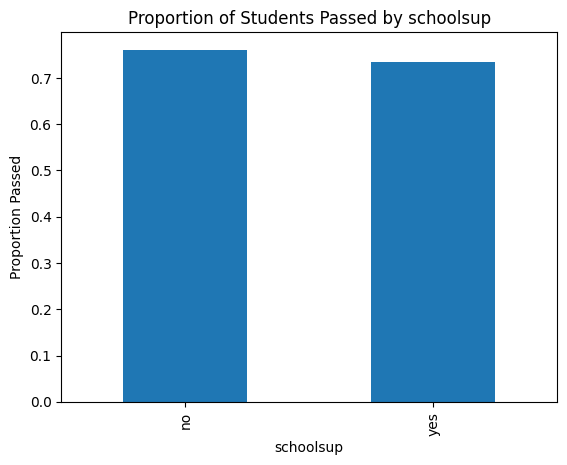

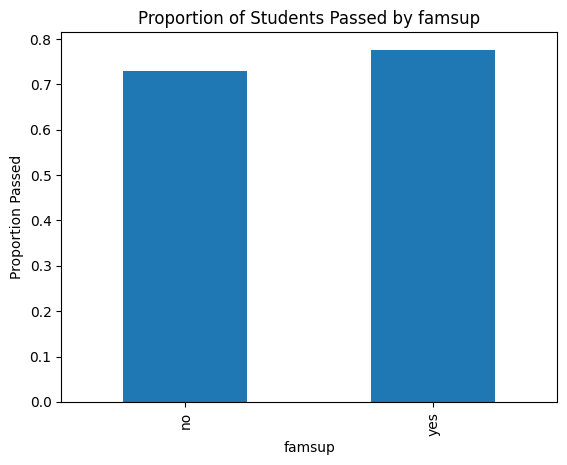

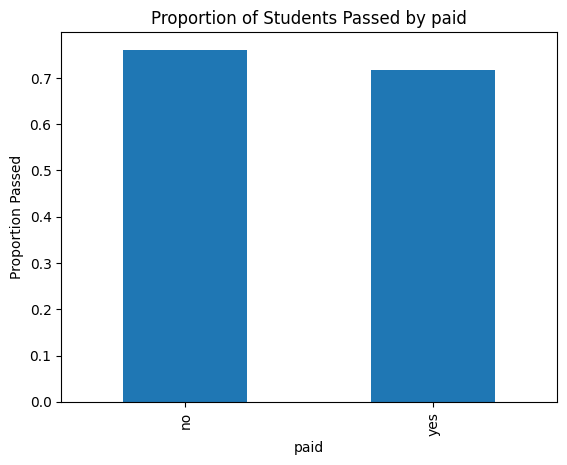

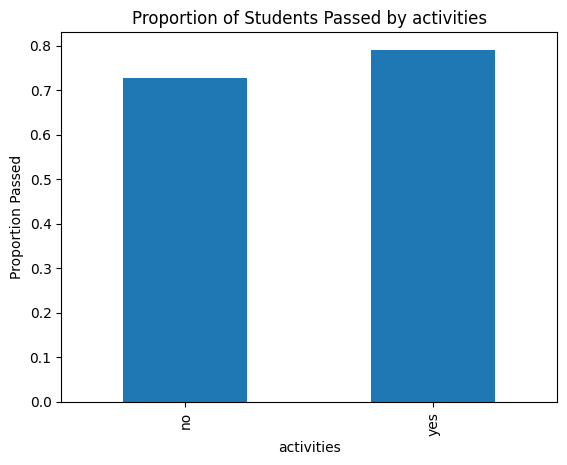

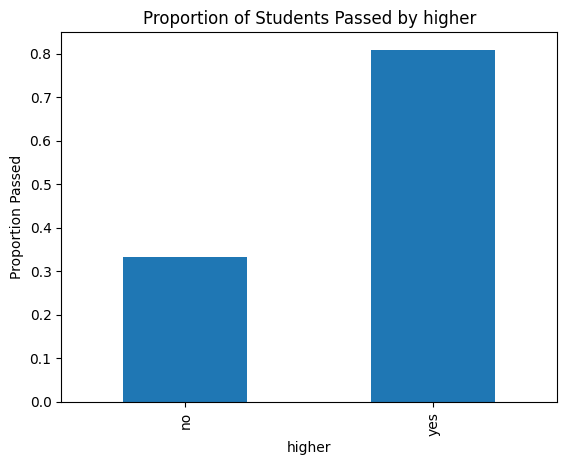

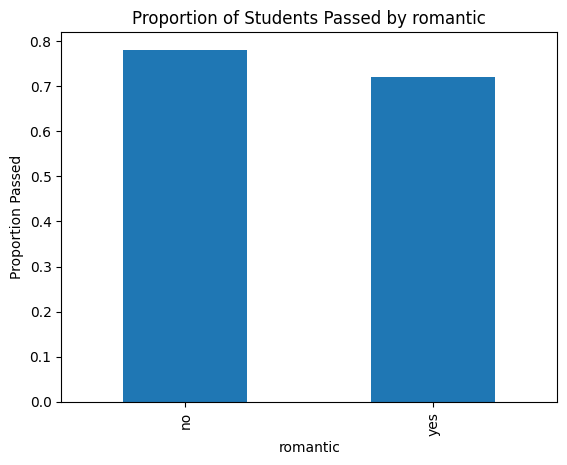

In [33]:
categorical_features = df[relevant_features].select_dtypes(include='object').columns

for col in categorical_features:
    pass_counts = df.groupby([col, 'Passed']).size().unstack(fill_value=0)
    pass_proportions = pass_counts[True] / (pass_counts[True] + pass_counts[False])
    pass_proportions.plot(kind='bar')
    plt.title(f'Proportion of Students Passed by {col}')
    plt.ylabel('Proportion Passed')
    plt.xlabel(col)
    plt.show()

**Reasoning**:
The previous code block failed because `plt` was not imported. Import `matplotlib.pyplot` and regenerate the code to plot the bar charts for the categorical features.



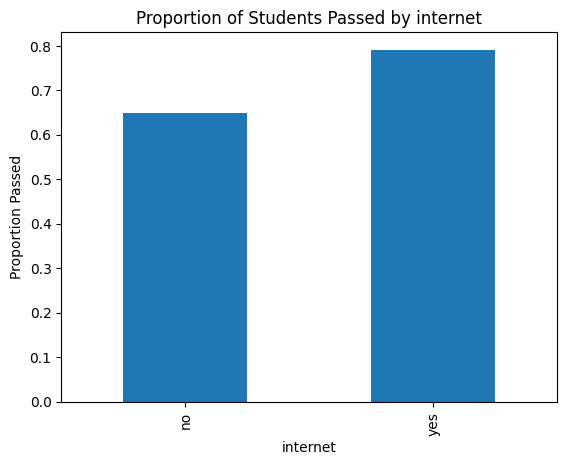

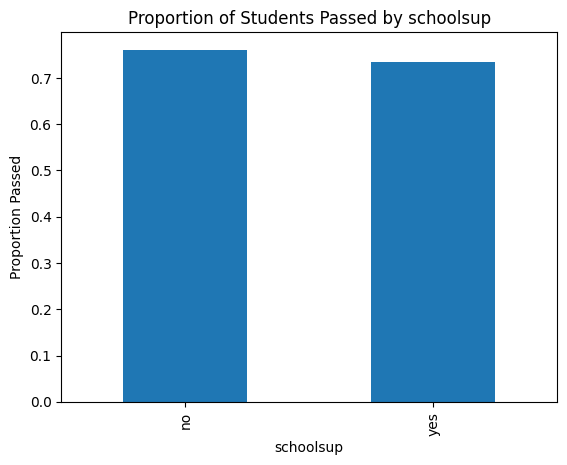

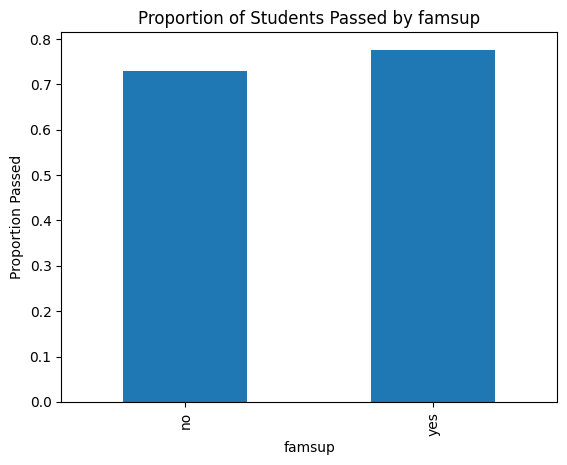

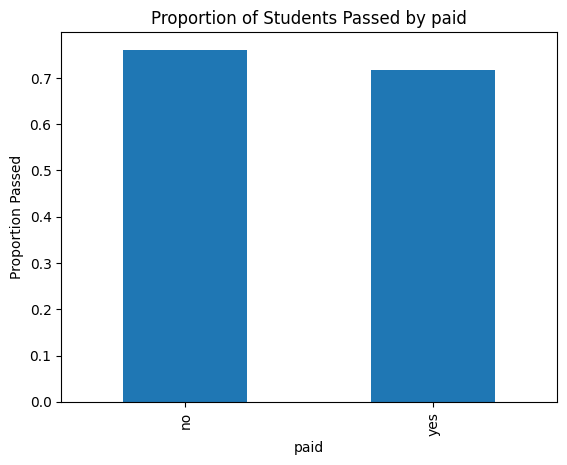

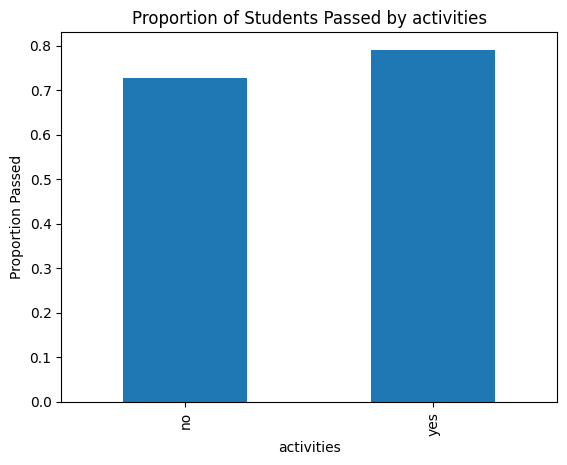

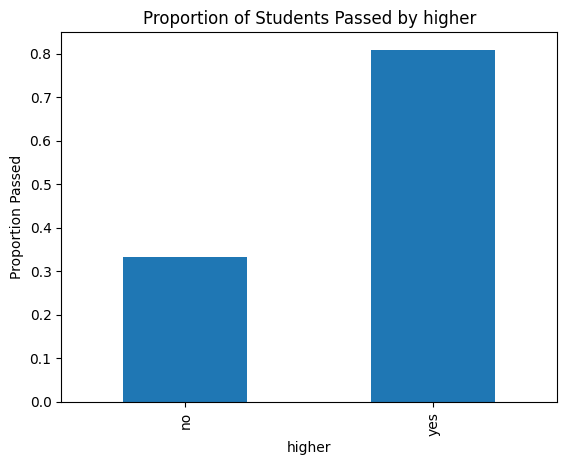

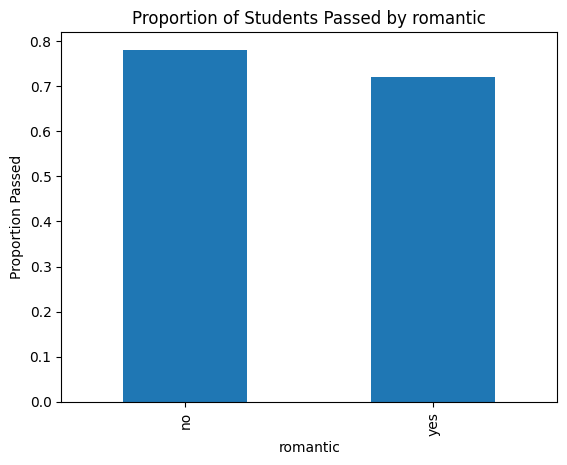

In [34]:
import matplotlib.pyplot as plt

categorical_features = df[relevant_features].select_dtypes(include='object').columns

for col in categorical_features:
    pass_counts = df.groupby([col, 'Passed']).size().unstack(fill_value=0)
    pass_proportions = pass_counts[True] / (pass_counts[True] + pass_counts[False])
    pass_proportions.plot(kind='bar')
    plt.title(f'Proportion of Students Passed by {col}')
    plt.ylabel('Proportion Passed')
    plt.xlabel(col)
    plt.show()

## Analyze relationships with numerical features

### Subtask:
For numerical features, use visualizations like box plots or scatter plots to see if there's a noticeable difference in the distribution of the numerical feature for students who passed versus those who didn't.


**Reasoning**:
Identify the numerical columns and generate box plots for each numerical column against the 'Passed' column to visualize potential differences in distributions.



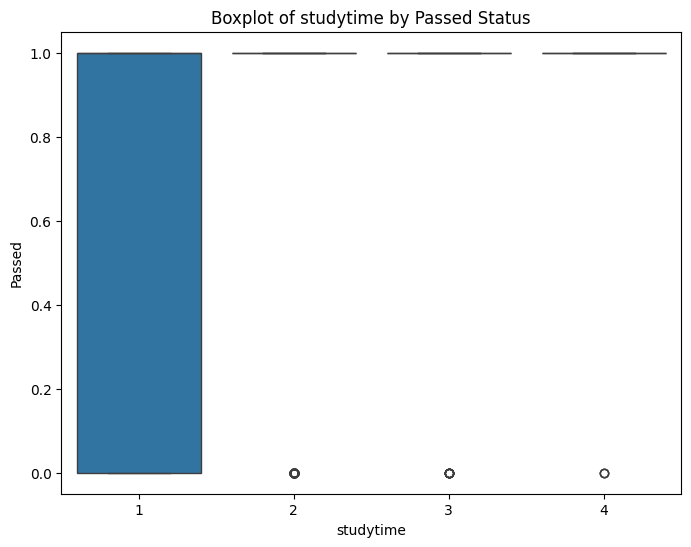

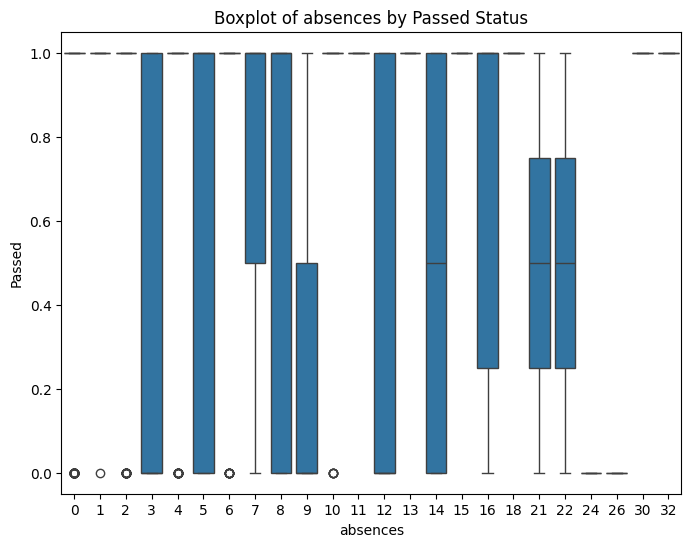

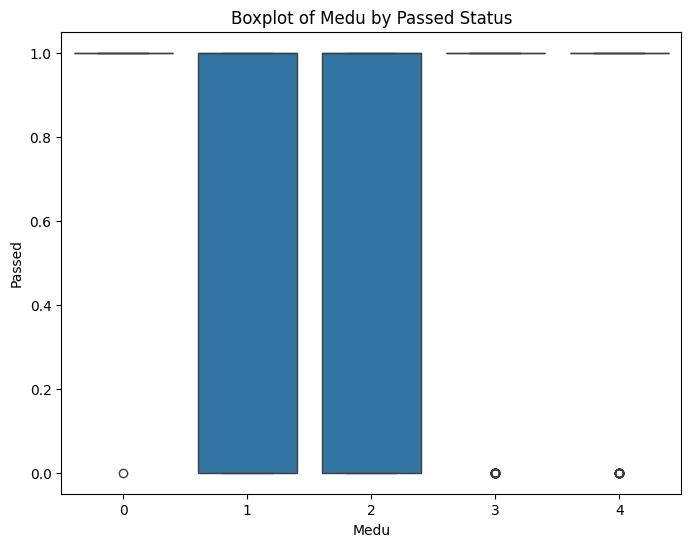

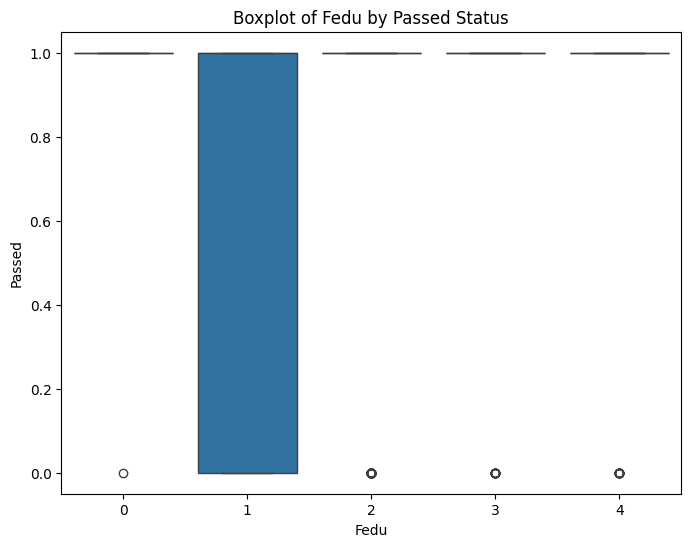

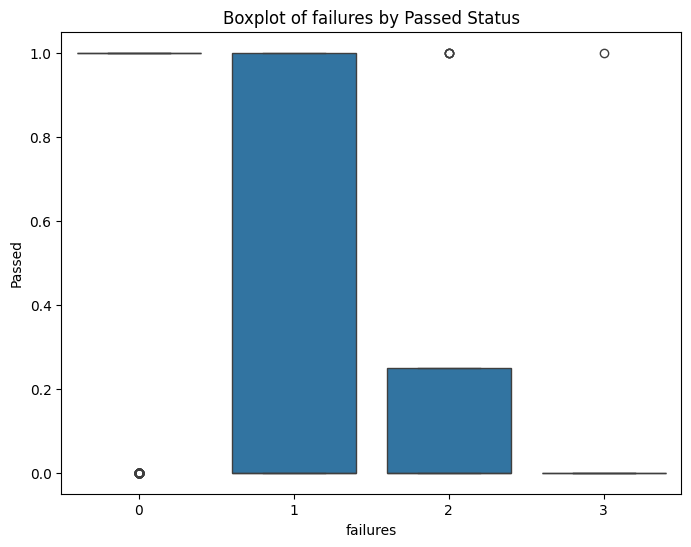

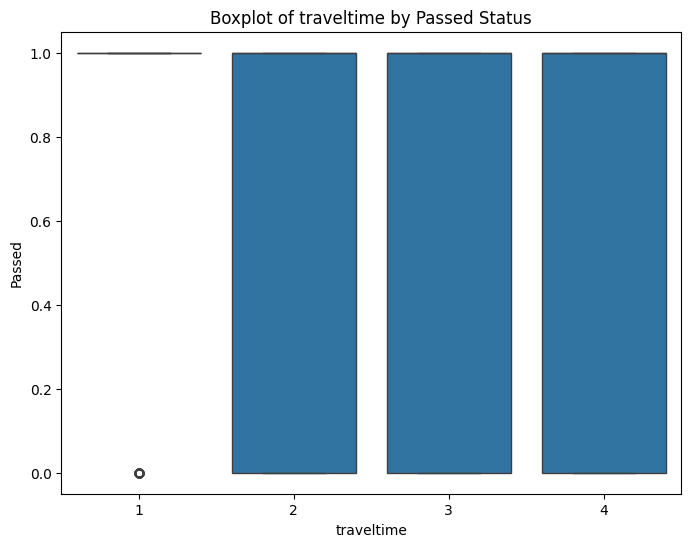

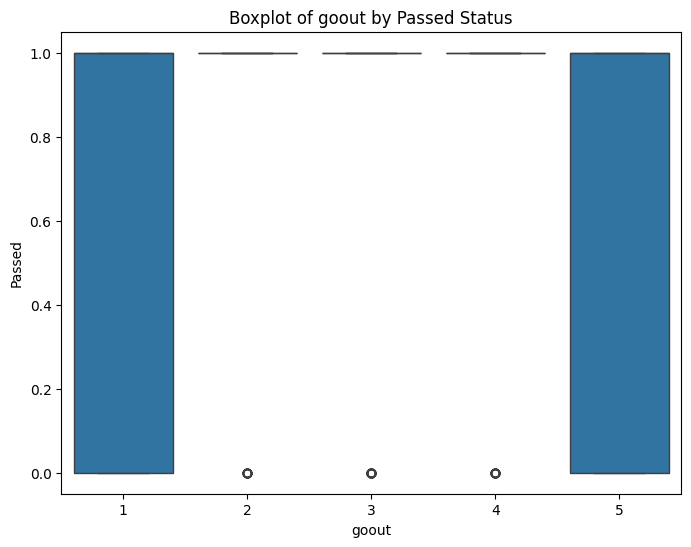

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = df[relevant_features].select_dtypes(include=['int64', 'float64']).columns

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Passed', data=df)
    plt.title(f'Boxplot of {col} by Passed Status')
    plt.xlabel(col)
    plt.ylabel('Passed')
    plt.show()

**Reasoning**:
To summarize the relationships observed, I will first analyze the categorical features by examining the proportions of students who passed for each category. I will then analyze the numerical features using the previously generated box plots to compare distributions between students who passed and those who did not. Finally, I will synthesize these observations into a concise summary. I will begin by re-creating the proportions for the categorical features to ensure I have the exact numbers for my summary.



In [36]:
categorical_features = df[relevant_features].select_dtypes(include='object').columns

for col in categorical_features:
    pass_counts = df.groupby([col, 'Passed']).size().unstack(fill_value=0)
    pass_proportions = pass_counts[True] / (pass_counts[True] + pass_counts[False])
    print(f"Proportion of students passed by {col}:")
    print(pass_proportions)
    print("\n")

Proportion of students passed by internet:
internet
no     0.649007
yes    0.791165
dtype: float64


Proportion of students passed by schoolsup:
schoolsup
no     0.760757
yes    0.735294
dtype: float64


Proportion of students passed by famsup:
famsup
no     0.729084
yes    0.776382
dtype: float64


Proportion of students passed by paid:
paid
no     0.760656
yes    0.717949
dtype: float64


Proportion of students passed by activities:
activities
no     0.727545
yes    0.790476
dtype: float64


Proportion of students passed by higher:
higher
no     0.333333
yes    0.808621
dtype: float64


Proportion of students passed by romantic:
romantic
no     0.780488
yes    0.719665
dtype: float64


